# Проект по разработке модели для предсказания оттока клиентов для оператора связи

**Описание проекта**

Оператор связи хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Предсказание оттока - одна из важнейших задач для прогнозирования прибыли.

**Цель исследования**

Разработать модель для прогноза оттока клиентов, которое позволит компании заранее находить таких пользователей предпринять меры по их удержанию в качестве клиентов.

**Задачи исследования**

Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Наша задача — обучить на этих данных модель для прогноза разорвёт ли абонент договор.


**Дополнительные условия**

 - Для оценки качества моделей применять метрику AUC-ROC.
 - Значение метрики AUC-ROC должно быть не менее 0.85.


**Описание услуг**

Оператор предоставляет два основных типа услуг:

- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (`DSL`, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (`Fiber optic`).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (`DeviceProtection`) и блокировка небезопасных сайтов (`OnlineSecurity`);
- Выделенная линия технической поддержки (`TechSupport`);
- Облачное хранилище файлов для резервного копирования данных (`OnlineBackup`);
- Стриминговое телевидение (`StreamingTV`) и каталог фильмов (`StreamingMovies`).

Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

**Описание данных**

Данные состоят из нескольких файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

Описание данных:

1. Файл `contract_new.csv`— информация о договоре:
       
  -  `customerID` — идентификатор абонента;
  -  `BeginDate` — дата начала действия договора;
  -  `EndDate` — дата окончания действия договора;
  -  `Type` — тип оплаты: раз в год-два или ежемесячно;
  -  `PaperlessBilling` — электронный расчётный лист;
  -  `PaymentMethod` — тип платежа;
  -  `MonthlyCharges` — расходы за месяц;
  -  `TotalCharges` — общие расходы абонента.


2. Файл `personal_new.csv`— персональные данные клиента:
       
  -  `customerID` — идентификатор пользователя;
  -  `gender` — пол;
  -  `SeniorCitizen` — является ли абонент пенсионером;
  -  `Partner` — есть ли у абонента супруг или супруга;
  -  `Dependents` — есть ли у абонента дети.
  

3. Файл `internet_new.csv` — информация об интернет-услугах:
       
  -  `customerID` — идентификатор пользователя;
  -  `InternetService` — тип подключения;
  -  `OnlineSecurity` — блокировка опасных сайтов;
  -  `OnlineBackup` — облачное хранилище файлов для резервного копирования данных;
  -  `DeviceProtection` — антивирус;
  -  `TechSupport` — выделенная линия технической поддержки;
  -  `StreamingTV` — стриминговое телевидение;
  -  `StreamingMovies` — каталог фильмов.


4. Файл `phone_new.csv` — информация об услугах телефонии:
       
  -  `customerID` — идентификатор пользователя;
  -  `MultipleLines` — подключение телефона к нескольким линиям одновременно.
  
**Информация о договорах актуальна на 1 февраля 2020 года.**

## План работы

1. Импорт используемых библиотеки (дополняем по мере необходимости);
2. Загрузка данных и первичный визуальный осмотр;
3. Первичная предобработка данных (при необходимости):
   - переименование столбцов;
   - изменение типа данных;
   - обработка дубликатов и ошибок;
4. Первичный исследовательские анализ данных:
   - исследование количественных признаков;
   - исследование качественных признаков;
5. Объединение датасетов;
6. Исследовательские анализ данных и предобработка данных объединенного датафрейма:
   - исследование количественных признаков;
   - исследование качественных признаков;
   - предобработка данных после объединения датафрейма (при необходимости);
   - генерация целевого признака;
   - генерация новых признаков (при необходимости);
   - корреляционных анализ;
   - формирование итогового датасета для обучения.
7. Подготовка данных для обучения;
8. Обучение моделей машинного обучения;
9. Выбор лучшей модели:
   - оценка лучшей модели на тестовых данных;
   - визуализация метрик лучшей модели;
   - оценка важности признаков.
10. Общий вывод и рекомендации заказчику.

## Импорт используемых библиотек

In [ ]:
!pip install phik -q
!pip install scikit-learn --upgrade -q
!pip install shap -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import phik
import shap

from phik import phik_matrix

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix
)

RANDOM_STATE = 60524
TEST_SIZE = 0.25

## Загрузка данных

In [ ]:
path_1 = '/datasets/contract_new.csv'
path_2 = 'https://.../datasets/contract_new.csv'

if os.path.exists(path_1):
    data = pd.read_csv(path_1, index_col=[0], parse_dates=[0])
else:
    try:
        data = pd.read_csv(path_2, index_col=[0], parse_dates=[0])
    except Exception as e:
        print(f'Error loading data from URL: {e}')

In [ ]:
path_1 = '/datasets/personal_new.csv'
path_2 = 'https://.../datasets/personal_new.csv'

if os.path.exists(path_1):
    data = pd.read_csv(path_1, index_col=[0], parse_dates=[0])
else:
    try:
        data = pd.read_csv(path_2, index_col=[0], parse_dates=[0])
    except Exception as e:
        print(f'Error loading data from URL: {e}')

In [ ]:
path_1 = '/datasets/internet_new.csv'
path_2 = 'https://.../datasets/internet_new.csv'

if os.path.exists(path_1):
    data = pd.read_csv(path_1, index_col=[0], parse_dates=[0])
else:
    try:
        data = pd.read_csv(path_2, index_col=[0], parse_dates=[0])
    except Exception as e:
        print(f'Error loading data from URL: {e}')

In [ ]:
path_1 = '/datasets/phone_new.csv'
path_2 = 'https://.../datasets/phone_new.csv'

if os.path.exists(path_1):
    data = pd.read_csv(path_1, index_col=[0], parse_dates=[0])
else:
    try:
        data = pd.read_csv(path_2, index_col=[0], parse_dates=[0])
    except Exception as e:
        print(f'Error loading data from URL: {e}')

Ознакомимся с данными:

In [ ]:
#универсальная функция для ознакомления с данными
def data_review(data):
    '''
    data - DataFrame

    '''
    print('*'*10, 'The Original DataFrame', '*'*10)
    display(data.head())
    print('')
    print('')
    print('*'*10, 'General Information', '*'*10)
    print('')
    data.info()
    print('')
    print('')
    print('*'*10, 'Has NaN', '*'*10)
    display(pd.DataFrame(data.isna().sum()).style.background_gradient('coolwarm'))
    print('*'*10, 'Has NaN Percentage', '*'*10)
    display(pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm'))
    print('')
    print('')
    print('*'*10, 'Descriptive Statistics', '*'*10)
    display(pd.DataFrame(data.describe()))

In [ ]:
data_review(data_contract)

********** The Original DataFrame **********


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5




********** General Information **********

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 440.2+ KB


********** Has NaN **********


,0
BeginDate,0
EndDate,0
Type,0
PaperlessBilling,0
PaymentMethod,0
MonthlyCharges,0
TotalCharges,0


********** Has NaN Percentage **********


,0
BeginDate,0.000000
EndDate,0.000000
Type,0.000000
PaperlessBilling,0.000000
PaymentMethod,0.000000
MonthlyCharges,0.000000
TotalCharges,0.000000




********** Descriptive Statistics **********


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [ ]:
data_review(data_personal)

********** The Original DataFrame **********


,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No




********** General Information **********

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


********** Has NaN **********


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0


********** Has NaN Percentage **********


,0
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000




********** Descriptive Statistics **********


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
data_review(data_internet)

********** The Original DataFrame **********


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No




********** General Information **********

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


********** Has NaN **********


,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0
StreamingTV,0
StreamingMovies,0


********** Has NaN Percentage **********


,0
InternetService,0.000000
OnlineSecurity,0.000000
OnlineBackup,0.000000
DeviceProtection,0.000000
TechSupport,0.000000
StreamingTV,0.000000
StreamingMovies,0.000000




********** Descriptive Statistics **********


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517
unique,2,2,2,2,2,2,2
top,Fiber optic,No,No,No,No,No,No
freq,3096,3498,3088,3095,3473,2810,2785


In [ ]:
data_review(data_phone)

********** The Original DataFrame **********


,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes




********** General Information **********

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


********** Has NaN **********


,0
MultipleLines,0


********** Has NaN Percentage **********


,0
MultipleLines,0.000000




********** Descriptive Statistics **********


,MultipleLines
count,6361
unique,2
top,No
freq,3390


### Выводы

- названия столбцов выполнено в camelCase нотации с нарушениями правил, требуется перевести столбцы к snake_case нотации;
- тип данных в столбце `TotalCharges` датафрейма `data_contract` содержит количественные данные и определен как `object`, требуется перевести к типу `float64`;
- тип данных в столбце `SeniorCitizen` датафрейма `data_personal` содержит булевы значения и определен как `int64` требуется перевести к типу `bool`;
- выявлены разнородные предположительно булевы типы данных, выраженные Yes-No значениями, необходимость их преобразования и перевод в тип `bool` выявим после объединения датафреймов;
- пропуски в столбцах не обнаружены.

##  Предобработка данных

Перед началом предобработки исходного датасета, пересохраним его в переменную df_x и создадим список датасетов и словарь датасетов:

In [ ]:
df_contract = data_contract.copy()
df_personal = data_personal.copy()
df_internet = data_internet.copy()
df_phone = data_phone.copy()

dfs = [df_contract, df_personal, df_internet, df_phone]

dfs_dict = {
    'df_contract': df_contract,
    'df_personal': df_personal,
    'df_internet': df_internet,
    'df_phone': df_phone
}

###  Переименование столбцов и индекса

Приведем столбцы к `snake_case` нотации и проверит результат:

In [ ]:
#функция для приведения к snake_case
def columns_to_snake_case(df):
    df.columns = df.columns.str.replace("([a-z])([A-Z])", r'\1_\2', regex=True).str.lower()
    return df.columns

In [ ]:
for df in dfs:
    columns_to_snake_case(df)
    print(df.columns)

Index(['begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges'],
      dtype='object')
Index(['gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')
Index(['internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')
Index(['multiple_lines'], dtype='object')


Не забудем привести назначенные при считывании файла индексы датафреймов к `snake_case` и проверим результат:

In [ ]:
for df in dfs:
    df.index.rename('customer_id', inplace= True )
    print(df.index.name)

customer_id
customer_id
customer_id
customer_id


###  Изменение типа данных

Приведем тип данных столбца `total_charges` к `float64`:

In [ ]:
df_contract['total_charges'] = pd.to_numeric(df_contract['total_charges'], errors='coerce')
print(df_contract['total_charges'].dtype)

float64


Параметр errors='coerce' указывает на то, что если есть некорректные значения (например, нечисловые строки), они будут преобразованы в NaN. Поэтому после изменения типа данных проверим на наличие пропусков:

In [ ]:
df_contract['total_charges'].isna().sum()

11

Обнаружены 11 пропусков. Определим их природу. Выведем на экран строки с пропущенными значениями в столбце `total_charges`:

In [ ]:
missing_values = df_contract[df_contract['total_charges'].isnull()]
missing_values

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
customer_id,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN


Мы помним, что информация о договорах актуальна на 1 февраля 2020 года. Можно сделать вывод, что `total_charges` не определен, так как договор на услуги заключен в крайнем доступном нам месяце. Проверим, нашу гипотезу, и выведим на экран все строки с датой начала договора 2020-02-01:

In [ ]:
current_begin_date = df_contract.loc[df_contract['begin_date'] == '2020-02-01']
current_begin_date

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
customer_id,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN


Гипотеза подтвердилась.

Примем решение, что делать с пропущенными строками. Все заключенные договора с типом оплаты `раз в год-два`, соответственно при заключении договора `total_charges` могли быть заполнены помесячной оплатой умноженной на тип контракта. Однако может возникнуть ситуация, при которой клиент решит расторгнуть договор заранее с возвратом средств и возможно, даже в текущем месяце, вернув всю оплаченную сумму. Таким образом запонение `total_charges` суммой оплаты за текущий месяц тоже нецелесообразно. Учитывая, что наша цель стоит в определии оттока клиентов. Клиенты, только что заключившие договор, не несут какой-либо информации для решения нашей задачи. Кроме того, 11 строк с пропущенными значениями в датасете из 7043 строк может быть безболезненно удалено, особенно учитывая их неинформативность для будушей модели.

**Вывод: принято решение удалить строки с пропущенными значениями.**

In [ ]:
df_contract.dropna(subset = ['total_charges'], inplace=True)
df_contract['total_charges'].isna().sum()

0

**Вывод: тип данных преобразован, удалено 11 строк.**

Приведем тип данных столбца `senior_citizen` к типу `bool`:

In [ ]:
df_personal['senior_citizen'] = df_personal['senior_citizen'].apply(lambda x: True if x == 1 else False)

Проверим, что датасет принял изменения правильно:

In [ ]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          7043 non-null   object
 1   senior_citizen  7043 non-null   bool  
 2   partner         7043 non-null   object
 3   dependents      7043 non-null   object
dtypes: bool(1), object(3)
memory usage: 227.0+ KB


Данные преобразованы корректно.

### Обработка дубликатов и ошибок

Проверим категориальные признаки на неявные дубликаты и ошибки, для этого выделим отдельно столбцы с количественными и категориальными признаками.

In [ ]:
def to_num_obj_col(df):
    num_col = df.select_dtypes(exclude=['object', 'datetime64[ns]', 'bool']).columns.tolist()
    obj_col = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    return num_col, obj_col

In [ ]:
num_col_df_contract, obj_col_df_contract = to_num_obj_col(df_contract)
num_col_df_personal, obj_col_df_personal = to_num_obj_col(df_personal)
num_col_df_internet, obj_col_df_internet = to_num_obj_col(df_internet)
num_col_df_phone, obj_col_df_phone = to_num_obj_col(df_phone)

In [ ]:
def obj_col_scan(df, cols):
    print('*'*10, 'Unique Names', '*'*10)
    for col in cols:
        print(col)
        print(df[col].unique())
        print('---' * 10)

In [ ]:
obj_col_scan(df_contract, obj_col_df_contract)

********** Unique Names **********
end_date
['No' '2017-05-01' '2016-03-01' '2018-09-01' '2018-11-01' '2018-12-01'
 '2019-08-01' '2018-07-01' '2017-09-01' '2015-09-01' '2016-07-01'
 '2016-06-01' '2018-03-01' '2019-02-01' '2018-06-01' '2019-06-01'
 '2020-01-01' '2019-11-01' '2016-09-01' '2015-06-01' '2016-12-01'
 '2019-05-01' '2019-04-01' '2017-06-01' '2017-08-01' '2018-04-01'
 '2018-08-01' '2018-02-01' '2019-07-01' '2015-12-01' '2014-06-01'
 '2018-10-01' '2019-01-01' '2017-07-01' '2017-12-01' '2018-05-01'
 '2015-11-01' '2019-10-01' '2019-03-01' '2016-02-01' '2016-10-01'
 '2018-01-01' '2017-11-01' '2015-10-01' '2019-12-01' '2015-07-01'
 '2017-04-01' '2015-02-01' '2017-03-01' '2016-05-01' '2016-11-01'
 '2015-08-01' '2019-09-01' '2017-10-01' '2017-02-01' '2016-08-01'
 '2016-04-01' '2015-05-01' '2014-09-01' '2014-10-01' '2017-01-01'
 '2015-03-01' '2015-01-01' '2016-01-01' '2015-04-01' '2014-12-01'
 '2014-11-01']
------------------------------
type
['Month-to-month' 'One year' 'Two year']
-

In [ ]:
obj_col_scan(df_personal, obj_col_df_personal)

********** Unique Names **********
gender
['Female' 'Male']
------------------------------
senior_citizen
[False  True]
------------------------------
partner
['Yes' 'No']
------------------------------
dependents
['No' 'Yes']
------------------------------


In [ ]:
obj_col_scan(df_internet, obj_col_df_internet)

********** Unique Names **********
internet_service
['DSL' 'Fiber optic']
------------------------------
online_security
['No' 'Yes']
------------------------------
online_backup
['Yes' 'No']
------------------------------
device_protection
['No' 'Yes']
------------------------------
tech_support
['No' 'Yes']
------------------------------
streaming_tv
['No' 'Yes']
------------------------------
streaming_movies
['No' 'Yes']
------------------------------


In [ ]:
obj_col_scan(df_phone, obj_col_df_phone)

********** Unique Names **********
multiple_lines
['No' 'Yes']
------------------------------


**Вывод: Неяных дубликатов и ошибок не обнаружено:**

Учитывая бинарность данных, проверим датасеты на дубликаты, сбросив индекс.

In [ ]:
for name, df in dfs_dict.items():
    df = df.reset_index()
    diplicated_rows = df.duplicated().sum()
    print('*'*10,'Name:', name, '*'*10, '\n')
    print('Number of Duplicates:', diplicated_rows, '\n')

********** Name: df_contract ********** 

Number of Duplicates: 0 

********** Name: df_personal ********** 

Number of Duplicates: 0 

********** Name: df_internet ********** 

Number of Duplicates: 0 

********** Name: df_phone ********** 

Number of Duplicates: 0 



#### Выводы

В реультате первоначальной предобработки данных были проведены следующие действия:

1. Наименования столбцов и индекса приведены к snake_case нотации;
2. Тип данный столбца `total_charges` приведен к типу `float64`, данное преобразование привело к появлению 11 строк со значениями NaN. В результате проведенного анализа данные строки удалены;
3. Тип данных столбца `senior_citizen` приведен к типу `bool`;
3. Ошибки и дубликаты в данных не обнаружены.

##  Исследовательский анализ

### Исследование количественных признаков

Для быстрого поиска столбцов с аномалиями создадим собственную функцию, которая построит для каждого количественного столбца гистограмму и ящик с усами:

In [ ]:
def num_to_scan(df, col):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Histogram
    sns.histplot(df, x=col, bins=50, ax=axes[0])
    axes[0].set_title(col)

    # Boxplot
    df.boxplot(column=col, ax=axes[1])
    axes[1].set_ylabel(col)

    plt.show()

Исследуем количественные признаки датафрейма `df_contract`, остальные датафреймы не имеют количественных признаков:

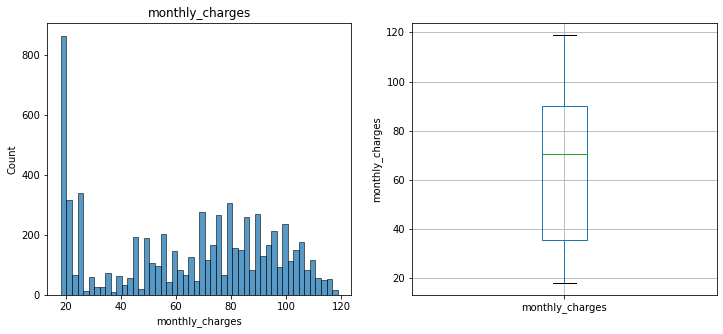

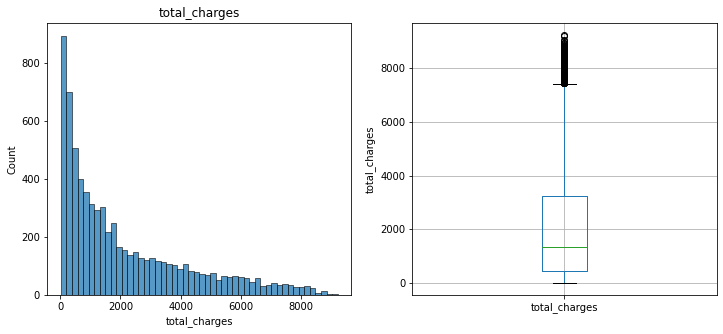

In [ ]:
for col in num_col_df_contract:
    num_to_scan(df_contract, col)

#### Выводы

1. На гистограмме столбца `monthly_charges` видно, что большинство клинтов в месяц платят около 20 долларов. Выбросы за границами размаха усов не обнаружены;
2. Столбец `total_charges` имеет правостороннее распределение. Определены выбросы за границами размаха усов, удалять данные выбросы нецелесообразно, так как они либо представляю группу лояльных компании клиентов с длительными контрактами, либо группу клиентов с высокими помесячными тарифами с риском расторжения контракта.

### Исследование качественных признаков

Для быстрого анализа качественных признаков создадим собственную функцию, которая построит для каждого качественного признака круговую диаграмму с основными данными:

In [ ]:
def cat_to_scan(df, col):
    x = df.groupby(col)[col].count()
    print(x)

    labels = list(x.index)
    colors = sns.color_palette('pastel')[ 0:5 ]

    plt.pie(x, colors = colors, autopct='%.0f%%')

    plt.title(col);
    plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    loc='best', labels=labels)
    plt.show();

Применим функцию с качественным признакам датафреймов, исключив столбeц `end_date`, содержащий даты окончания конракта или значение `No`, если клиент действующий.

type
Month-to-month    3875
One year          1472
Two year          1685
Name: type, dtype: int64


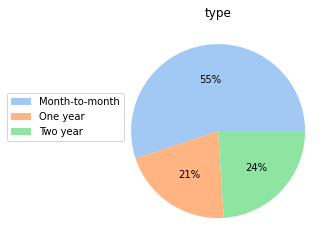

paperless_billing
No     2864
Yes    4168
Name: paperless_billing, dtype: int64


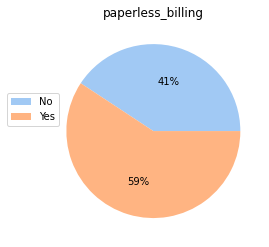

payment_method
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Electronic check             2365
Mailed check                 1604
Name: payment_method, dtype: int64


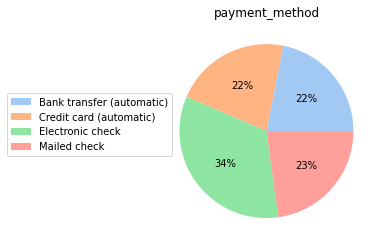

In [ ]:
for col in obj_col_df_contract:
    if col == 'end_date':
        pass
    else:
        cat_to_scan(df_contract, col)

gender
Female    3488
Male      3555
Name: gender, dtype: int64


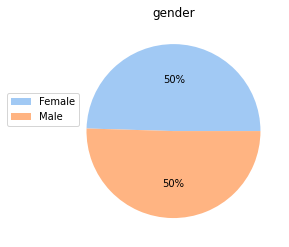

senior_citizen
False    5901
True     1142
Name: senior_citizen, dtype: int64


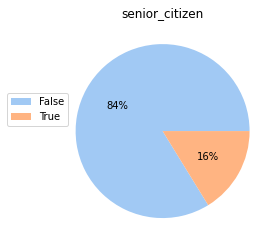

partner
No     3641
Yes    3402
Name: partner, dtype: int64


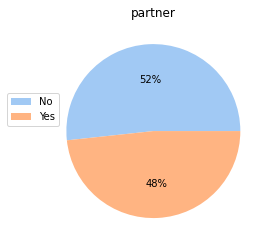

dependents
No     4933
Yes    2110
Name: dependents, dtype: int64


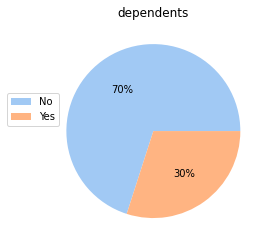

In [ ]:
for col in obj_col_df_personal:
    cat_to_scan(df_personal, col)

internet_service
DSL            2421
Fiber optic    3096
Name: internet_service, dtype: int64


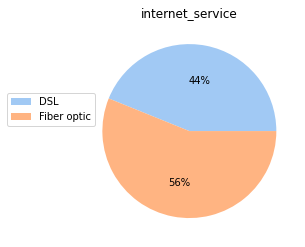

online_security
No     3498
Yes    2019
Name: online_security, dtype: int64


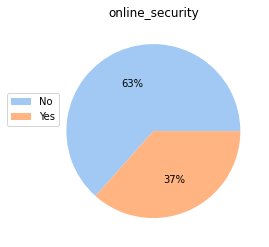

online_backup
No     3088
Yes    2429
Name: online_backup, dtype: int64


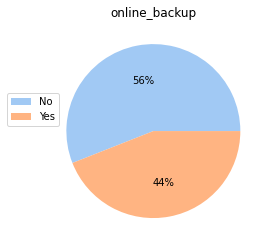

device_protection
No     3095
Yes    2422
Name: device_protection, dtype: int64


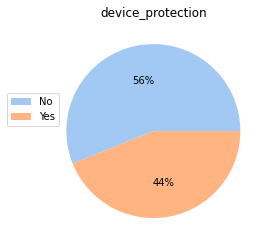

tech_support
No     3473
Yes    2044
Name: tech_support, dtype: int64


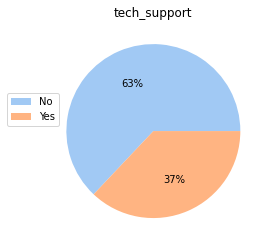

streaming_tv
No     2810
Yes    2707
Name: streaming_tv, dtype: int64


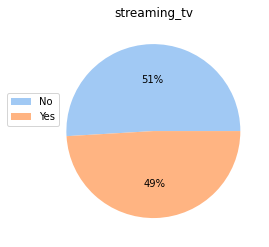

streaming_movies
No     2785
Yes    2732
Name: streaming_movies, dtype: int64


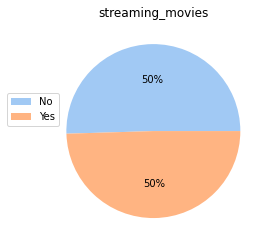

In [ ]:
for col in obj_col_df_internet:
    cat_to_scan(df_internet, col)

multiple_lines
No     3390
Yes    2971
Name: multiple_lines, dtype: int64


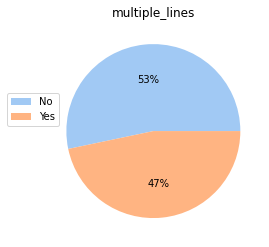

In [ ]:
for col in obj_col_df_phone:
    cat_to_scan(df_phone, col)


#### Выводы

1. `df_contract`

- Столбец `type` показывает, что более половины клиентов предпочитают помесячныу оплату долгосрочным договорам. Договора на 1 и 2 года делят второрую половину клиентов практически поровну;
- Столбец `paperless_billing` отображает, что 59 % клиентов предпочитают не получать бумажных счетов, это хороший знак для экологии;
- Столбец `payment_method` показывает, что в методе оплаты с 34 % лидирует электронный чек, остальные 3 вида оплаты делят поровну по 22 - 23 % клиентов.

2. `df_personal`

- Столбец `gender` говорит нам о том, что мужчин и женщин в числе клинтов ровно поровну;
- Столбец `senior_citizen` отображает, что всего 16 % клиентов достигли пенсионного возраста;
- Столбец `partner` показывает, что в клиенты с партнерами и без также поделены примерно поровну;
- Столбец `dependents` определил, что у 30 % клиентов есть дети.

3. `df_internet`, `df_phone`

- `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, `multiple_lines` датафреймов `df_internet`, `df_phone` показывают, что различными услугами компании клиенты пользуются с примерно расперделением равным от 37 % к 63 % до 50 % к 50 %.


### Выводы о релевантных признаках

Изучив все имеющиеся признаки, можно сделать вывод, что за исключением признаков `begin_date` и `end_date`, из которых в дальнейшем можно получить более информативные признаки и целевой признак, все остальные признаки подходят для обучения модели.

##  Объединение данных

Последовательно объединим датафреймы по индексу:

In [ ]:
df_full = df_contract.join(df_personal, how='left')
df_full = df_full.join(df_internet, how='left')
df_full = df_full.join(df_phone, how='left')

Проверим результат объединения:

In [ ]:
data_review(df_full)

********** The Original DataFrame **********


,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,False,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,False,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,False,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,False,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,False,No,No,Fiber optic,No,No,No,No,No,No,No




********** General Information **********

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7032 non-null   datetime64[ns]
 1   end_date           7032 non-null   object        
 2   type               7032 non-null   object        
 3   paperless_billing  7032 non-null   object        
 4   payment_method     7032 non-null   object        
 5   monthly_charges    7032 non-null   float64       
 6   total_charges      7032 non-null   float64       
 7   gender             7032 non-null   object        
 8   senior_citizen     7032 non-null   bool          
 9   partner            7032 non-null   object        
 10  dependents         7032 non-null   object        
 11  internet_service   5512 non-null   object        
 12  online_security    5512 non-null   object        
 13  online_b

,0
begin_date,0
end_date,0
type,0
paperless_billing,0
payment_method,0
monthly_charges,0
total_charges,0
gender,0
senior_citizen,0
partner,0


********** Has NaN Percentage **********


,0
begin_date,0.000000
end_date,0.000000
type,0.000000
paperless_billing,0.000000
payment_method,0.000000
monthly_charges,0.000000
total_charges,0.000000
gender,0.000000
senior_citizen,0.000000
partner,0.000000




********** Descriptive Statistics **********


,monthly_charges,total_charges
count,7032.000000,7032.000000
mean,64.798208,2118.621822
std,30.085974,2112.736199
min,18.250000,19.050000
25%,35.587500,439.745000
50%,70.350000,1345.275000
75%,89.862500,3239.317500
max,118.750000,9221.380000


Итак, после объединения мы получили пропущенные значения в тех строках, где клиент не использует услугу. Количество строк с пропусками достаточно большое, их удаление нецелесообразно и ведет к потере большого количества данных. Заменим пропуски в столбцах на заглушку `Not used`:

In [ ]:
df_full.fillna('Not used', inplace=True)

Проверим, что пропуски отсутствуют:

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7032 non-null   datetime64[ns]
 1   end_date           7032 non-null   object        
 2   type               7032 non-null   object        
 3   paperless_billing  7032 non-null   object        
 4   payment_method     7032 non-null   object        
 5   monthly_charges    7032 non-null   float64       
 6   total_charges      7032 non-null   float64       
 7   gender             7032 non-null   object        
 8   senior_citizen     7032 non-null   bool          
 9   partner            7032 non-null   object        
 10  dependents         7032 non-null   object        
 11  internet_service   7032 non-null   object        
 12  online_security    7032 non-null   object        
 13  online_backup      7032 non-null   object        
 14

### Выводы

Признаки объединены в один датафрейм, пропущенные значения обработаны.

##  Исследовательский анализ объединенного датафрейма

In [ ]:
num_col_df_full, obj_col_df_full = to_num_obj_col(df_full)

### Исследование количественных признаков

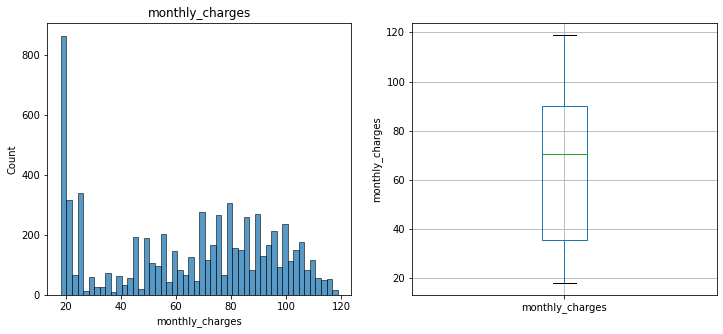

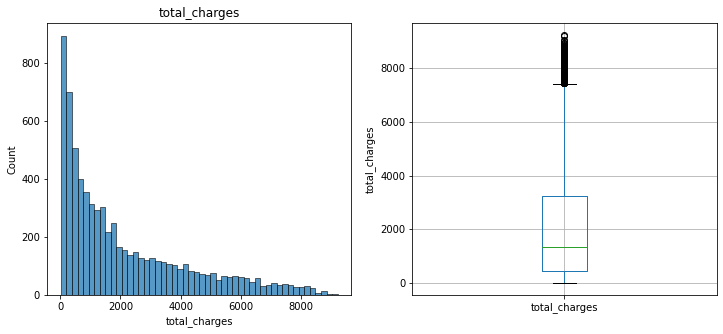

In [ ]:
for col in num_col_df_full:
    num_to_scan(df_full, col)

### Исследование качественных признаков

type
Month-to-month    3875
One year          1472
Two year          1685
Name: type, dtype: int64


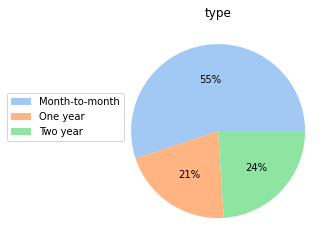

paperless_billing
No     2864
Yes    4168
Name: paperless_billing, dtype: int64


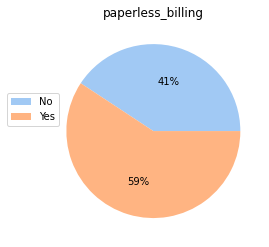

payment_method
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Electronic check             2365
Mailed check                 1604
Name: payment_method, dtype: int64


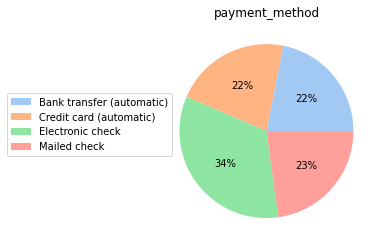

gender
Female    3483
Male      3549
Name: gender, dtype: int64


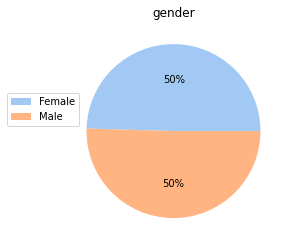

senior_citizen
False    5890
True     1142
Name: senior_citizen, dtype: int64


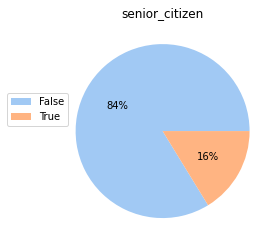

partner
No     3639
Yes    3393
Name: partner, dtype: int64


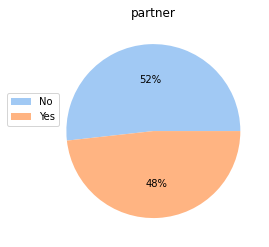

dependents
No     4933
Yes    2099
Name: dependents, dtype: int64


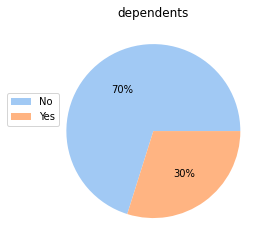

internet_service
DSL            2416
Fiber optic    3096
Not used       1520
Name: internet_service, dtype: int64


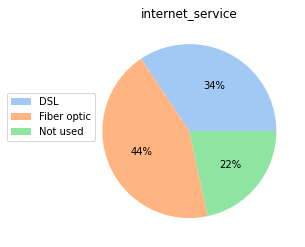

online_security
No          3497
Not used    1520
Yes         2015
Name: online_security, dtype: int64


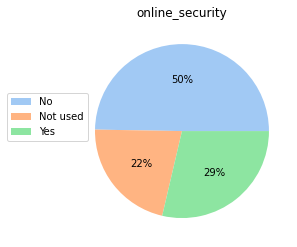

online_backup
No          3087
Not used    1520
Yes         2425
Name: online_backup, dtype: int64


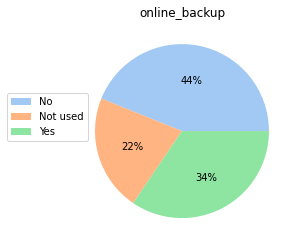

device_protection
No          3094
Not used    1520
Yes         2418
Name: device_protection, dtype: int64


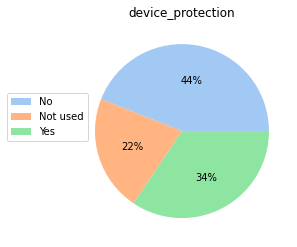

tech_support
No          3472
Not used    1520
Yes         2040
Name: tech_support, dtype: int64


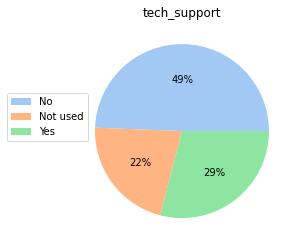

streaming_tv
No          2809
Not used    1520
Yes         2703
Name: streaming_tv, dtype: int64


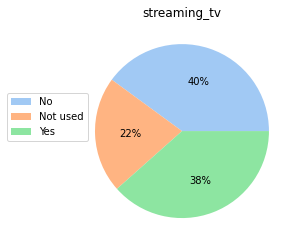

streaming_movies
No          2781
Not used    1520
Yes         2731
Name: streaming_movies, dtype: int64


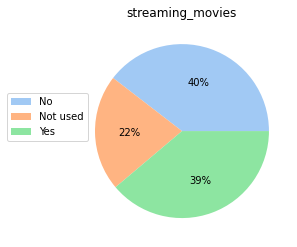

multiple_lines
No          3385
Not used     680
Yes         2967
Name: multiple_lines, dtype: int64


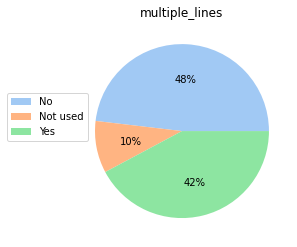

In [ ]:
for col in obj_col_df_full:
    if col == 'end_date':
        pass
    else:
        cat_to_scan(df_full, col)

#### Выводы

1. Количественные признаки не изменились;
2. В качественные признаки, в которых мы поставили заглушку `Not used` добавилось дополнительное значение, признаки, которые ранее могли быть бинарными, перестали быть таковыми.
3. В качестве бинарных признаков с типом данных `object` имеем столбцы `paperless_billing`, `gender`, `partner`, `dependents`. Требуется приведение данного типа данных к `bool`.

### Предобработка данных объединенного датафрейма

####  Изменение типа данных

Приведет тип данных бинарных признаков у типу `bool`:

In [ ]:
columns_to_bool = ['paperless_billing', 'partner', 'dependents']

In [ ]:
for col in columns_to_bool:
    df_full[col] = df_full[col].apply(lambda x: True if x == 'Yes' else False)

Проверим результат:

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7032 non-null   datetime64[ns]
 1   end_date           7032 non-null   object        
 2   type               7032 non-null   object        
 3   paperless_billing  7032 non-null   bool          
 4   payment_method     7032 non-null   object        
 5   monthly_charges    7032 non-null   float64       
 6   total_charges      7032 non-null   float64       
 7   gender             7032 non-null   object        
 8   senior_citizen     7032 non-null   bool          
 9   partner            7032 non-null   bool          
 10  dependents         7032 non-null   bool          
 11  internet_service   7032 non-null   object        
 12  online_security    7032 non-null   object        
 13  online_backup      7032 non-null   object        
 14

###  Генерация целевого и новых признаков

####  Генерация целевого признака

Создадим целевой признак из столбца `end_date`:

In [ ]:
df_full['target'] = df_full['end_date'].apply(lambda x: 0 if x == 'No' else 1)

Проверим, что целевой признак добавлен:

In [ ]:
df_full.head()

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target
customer_id,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,True,Electronic check,29.85,31.04,Female,False,True,False,DSL,No,Yes,No,No,No,No,Not used,0
5575-GNVDE,2017-04-01,No,One year,False,Mailed check,56.95,2071.84,Male,False,False,False,DSL,Yes,No,Yes,No,No,No,No,0
3668-QPYBK,2019-10-01,No,Month-to-month,True,Mailed check,53.85,226.17,Male,False,False,False,DSL,Yes,Yes,No,No,No,No,No,0
7795-CFOCW,2016-05-01,No,One year,False,Bank transfer (automatic),42.30,1960.60,Male,False,False,False,DSL,Yes,No,Yes,Yes,No,No,Not used,0
9237-HQITU,2019-09-01,No,Month-to-month,True,Electronic check,70.70,353.50,Female,False,False,False,Fiber optic,No,No,No,No,No,No,No,0


Посмотрим на распределение целевого признака:

target
0    5931
1    1101
Name: target, dtype: int64


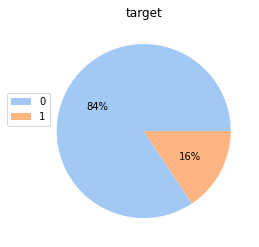

In [ ]:
cat_to_scan(df_full, 'target')

Выявлен дисбаланс целевого признака.

####  Генерация новых признаков

Создадим новый признак - количество дней контракта. Для этого создадим дополнительный столбец из столбца `end_date`, где заменим значение `No` на крайнюю дату датасета - 2020-02-01.

In [ ]:
df_full['end_date_2'] = df_full['end_date'].apply(lambda x: '2020-02-01' if x == 'No' else x)

И приведем столбец к типу `datetime64[ns]`:

In [ ]:
df_full['end_date_2'] = df_full['end_date_2'].astype('datetime64[ns]')

Создадим новый признак:

In [ ]:
df_full['duration'] = (df_full['end_date_2'] - df_full['begin_date']).dt.days

Проверим результат:

In [ ]:
df_full.head()

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target,end_date_2,duration
customer_id,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,True,Electronic check,29.85,31.04,Female,False,True,...,No,Yes,No,No,No,No,Not used,0,2020-02-01,31
5575-GNVDE,2017-04-01,No,One year,False,Mailed check,56.95,2071.84,Male,False,False,...,Yes,No,Yes,No,No,No,No,0,2020-02-01,1036
3668-QPYBK,2019-10-01,No,Month-to-month,True,Mailed check,53.85,226.17,Male,False,False,...,Yes,Yes,No,No,No,No,No,0,2020-02-01,123
7795-CFOCW,2016-05-01,No,One year,False,Bank transfer (automatic),42.30,1960.60,Male,False,False,...,Yes,No,Yes,Yes,No,No,Not used,0,2020-02-01,1371
9237-HQITU,2019-09-01,No,Month-to-month,True,Electronic check,70.70,353.50,Female,False,False,...,No,No,No,No,No,No,No,0,2020-02-01,153


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7032 non-null   datetime64[ns]
 1   end_date           7032 non-null   object        
 2   type               7032 non-null   object        
 3   paperless_billing  7032 non-null   bool          
 4   payment_method     7032 non-null   object        
 5   monthly_charges    7032 non-null   float64       
 6   total_charges      7032 non-null   float64       
 7   gender             7032 non-null   object        
 8   senior_citizen     7032 non-null   bool          
 9   partner            7032 non-null   bool          
 10  dependents         7032 non-null   bool          
 11  internet_service   7032 non-null   object        
 12  online_security    7032 non-null   object        
 13  online_backup      7032 non-null   object        
 14

###  Корреляционный анализ

Проверим признаки на мультиколлинеорность:

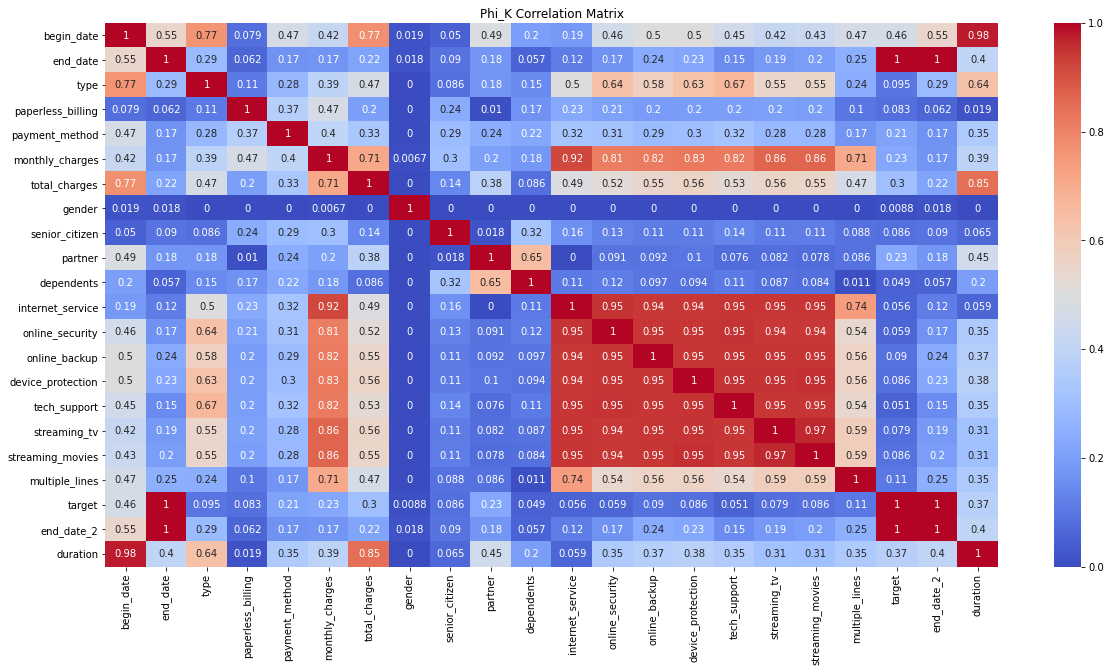

In [ ]:
corr_matrix = df_full.phik_matrix(
    interval_cols=[
        'monthly_charges',
        'total_charges',
        'duration'
    ]
)

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show();

Дополнительно визуализируем коэффициенты корреляции по целевому признаку `target` `1` - `клиент ушел`, `0` - `клиент остался` посмотрим на различия:

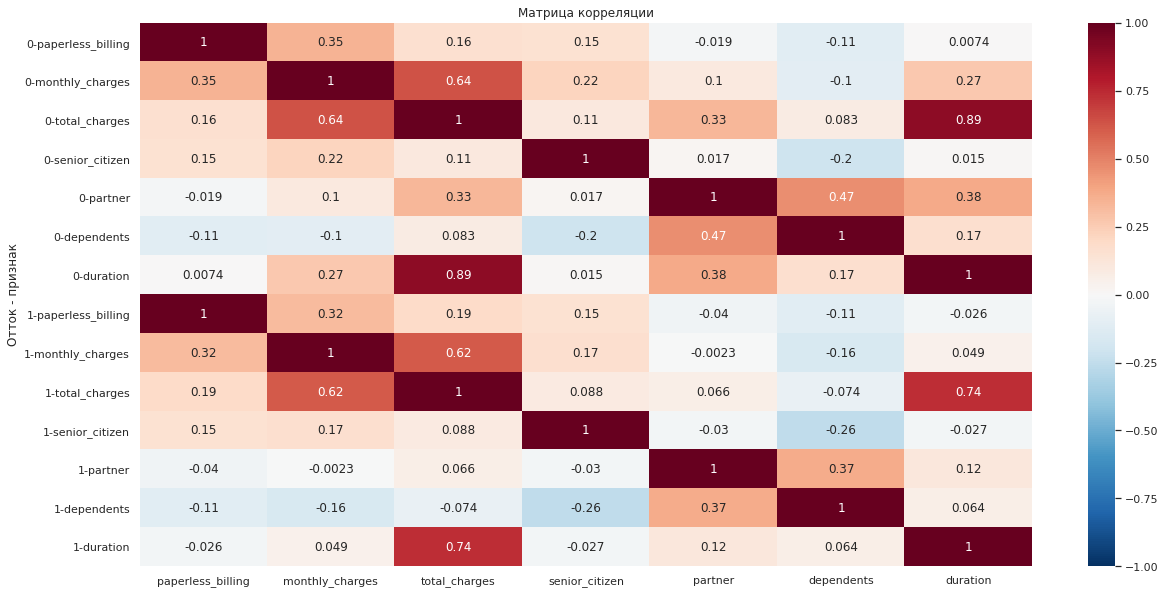

In [ ]:
df_full_corr_1 = df_full.groupby('target') \
[['begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method',
  'monthly_charges', 'total_charges', 'gender', 'senior_citizen',
  'partner', 'dependents', 'internet_service', 'online_security',
  'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
  'streaming_movies', 'multiple_lines', 'end_date_2', 'duration']].corr(method='spearman')

sns.set(font_scale=1)
plt.figure(figsize=(20, 10))
sns.heatmap(
    df_full_corr_1,
    annot = True,
    vmin=-1, vmax=1, center= 0,
    cmap= 'RdBu_r');

plt.title('Матрица корреляции')
plt.ylabel('Отток - признак');

#### Выводы

1. Мультиколлинеарности (очень высокие корреляций (0.9 +)) обнаружены среди столбцами с датами их производными. Для дальнейшего обучения исключим столбцы `begin_date`, `end_date`, `end_date_2`. Также мультиколлинеарности обнаружены внутри признаков с интернет-услугами.

2. Высокие корреляции выявлены между столбцом `monthly_charges` и столбцами с дополнительными интернет-услугами. Это закономерно.

3. Целевой признак `target` имеет слабую корреляцию с входным признаком `duration`, `total_charges`, `monthly_charges`, `partner`, `payment_method` - от 0,21 до 0,37, с остальными признаками корреляция очень слабая.

### Формирование  итогового датасета для обучения

Для дальнейшего обучения будут исключены признаки с датами, так как они мультиколлинеарны к новому признаку `duration` и в принципе не могут быть использованы для обучения модели, так как при дальнейшей работе модели в продакшене, даты будут отличны от тех, на которых обучалась бы модель.

Удалим нерелевантные признаки:

In [ ]:
df_final = df_full.drop(['begin_date', 'end_date', 'end_date_2'], axis=1)

Проверим получившийся датафрейм:

In [ ]:
df_final.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target,duration
customer_id,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,True,Electronic check,29.85,31.04,Female,False,True,False,DSL,No,Yes,No,No,No,No,Not used,0,31
5575-GNVDE,One year,False,Mailed check,56.95,2071.84,Male,False,False,False,DSL,Yes,No,Yes,No,No,No,No,0,1036
3668-QPYBK,Month-to-month,True,Mailed check,53.85,226.17,Male,False,False,False,DSL,Yes,Yes,No,No,No,No,No,0,123
7795-CFOCW,One year,False,Bank transfer (automatic),42.30,1960.60,Male,False,False,False,DSL,Yes,No,Yes,Yes,No,No,Not used,0,1371
9237-HQITU,Month-to-month,True,Electronic check,70.70,353.50,Female,False,False,False,Fiber optic,No,No,No,No,No,No,No,0,153


##  Подготовка данных

Создадим функцию для подготовки данных:

In [ ]:
#функция для подготовки данных
def prepare_data(df):
    X = df.drop(['target'], axis=1)
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        stratify=y,
        test_size=TEST_SIZE,
        random_state=RANDOM_STATE
    )
    num_col_names = X_train.select_dtypes(include='number').columns.tolist()
    cat_col_names = X_train.select_dtypes(exclude='number').columns.tolist()

    return X_train, X_test, y_train, y_test, num_col_names, cat_col_names

In [ ]:
X_train, X_test, y_train, y_test, num_col_names, cat_col_names = prepare_data(df_final)

Проверим размеры и размерности полученных выборок:

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5274, 18), (1758, 18), (5274,), (1758,))

##  Обучение моделей машинного обучения

Создадим словарь моделей с гиперпараметрами для поиска лучшей модели методом RandomizedSearchCV. Так как большинство наших признаков категориальные среди возможных моделей для обучения целесообразно взять CatBoostClassifier. Однако среди 5 более заметно коррелирующих с целевым признаком признаков - 3 количественных попробуем также модель LogisticRegression. В итоге возьмем 2 модели для поиска наилучшей: CatBoostClassifier и LogisticRegression.

In [ ]:
param_grid = [
    {
        'models': [CatBoostClassifier(random_seed=RANDOM_STATE, verbose=False)],
        'models__iterations': [500, 1000],
        'models__learning_rate': [0.01, 0.05],
        'models__depth': [4, 6]
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 10),
        'preprocessor__num':[StandardScaler(), MinMaxScaler()]
    }
]

Создадим пайплайн для кодирования и масштабирования в случае применения для обучения моделей требующих данный этап, например, LogisticRegression.

In [ ]:
data_preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_col_names),
    ('num', MinMaxScaler(), num_col_names)
],
    remainder='passthrough'
)

Создадим итоговый пайплайн для обучения модели:

In [ ]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', CatBoostClassifier(random_seed=RANDOM_STATE, verbose=False))
    ]
)

Запустим автоматический поиск лучшей модели методом RandomizedSearchCV с метрикой ROC-AUC. Выбор метрики обусловлен ее устойчивостью к несбалансированным классам:

In [ ]:
random_search = RandomizedSearchCV(
    pipe_final,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE
)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['type',
                                                                                'paperless_billing',
                                                                                'payment_method',
                                                                                'gender',
                                                                                'senior_citizen',
                                                                                'partner',
                                                                                'dependents',
                                                                                'internet_service',
                                                                                'online_security',
                                                                                'online_backup',
                                                                                'device_protection',
                                                                                't...
                   param_distributions=[{'models': [<catboost.core.CatBoostClassifier object at 0x7f325bc694c0>],
                                         'models__depth': [4, 6],
                                         'models__iterations': [500, 1000],
                                         'models__learning_rate': [0.01, 0.05]},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=60524,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler()]}],
                   random_state=60524, scoring='roc_auc')

In [ ]:
random_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type', 'paperless_billing',
                                                   'payment_method', 'gender',
                                                   'senior_citizen', 'partner',
                                                   'dependents',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                                   'multiple_lines']),
                                                 ('num', MinMaxScaler(),
                                                  ['monthly_charges',
                                                   'total_charges',
                                                   'duration'])])),
                ('models',
                 <catboost.core.CatBoostClassifier object at 0x7f325b9d60d0>)])

In [ ]:
print(f'AUC-ROC для лучшей модели CatBoostClassifier на кросс-валидации: {random_search.best_score_:.2f}')

AUC-ROC для лучшей модели CatBoostClassifier на кросс-валидации: 0.90


In [ ]:
rs = pd.DataFrame(random_search.cv_results_)
rs.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__C,param_models,param_models__learning_rate,param_models__iterations,param_models__depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.322390,0.114754,0.016395,0.002457,MinMaxScaler(),9,"LogisticRegression(penalty='l1', random_state=...",NaN,NaN,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.790200,0.758032,0.761798,0.756745,0.760998,0.765555,0.012462,13
1,2.536874,0.148724,0.022597,0.001448,NaN,NaN,<catboost.core.CatBoostClassifier object at 0x...,0.05,1000,4,"{'models__learning_rate': 0.05, 'models__itera...",0.919674,0.902560,0.900361,0.908676,0.881740,0.902602,0.012398,1
2,0.329517,0.115434,0.014376,0.000614,StandardScaler(),1,"LogisticRegression(penalty='l1', random_state=...",NaN,NaN,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.789346,0.757835,0.761355,0.757085,0.760514,0.765227,0.012165,20
3,0.433563,0.088288,0.014386,0.000769,StandardScaler(),6,"LogisticRegression(penalty='l1', random_state=...",NaN,NaN,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.789509,0.758189,0.761845,0.756813,0.760930,0.765457,0.012162,16
4,4.030927,0.088417,0.022325,0.000223,NaN,NaN,<catboost.core.CatBoostClassifier object at 0x...,0.05,1000,6,"{'models__learning_rate': 0.05, 'models__itera...",0.911319,0.908403,0.890317,0.905638,0.876006,0.898337,0.013313,2


##  Выбор лучшей модели

По результатам работы RandomSearch на кросс-валидации выбрана лучшая модель CatBoostClassifier с гиперпараметрами:

In [ ]:
random_search.best_params_

{'models__learning_rate': 0.05,
 'models__iterations': 1000,
 'models__depth': 4,
 'models': <catboost.core.CatBoostClassifier at 0x7f325bc694c0>}

###  Оценка лучшей модели на тестовых данных

Проверим модель на тестовых данных:

In [ ]:
y_test_pred_proba = random_search.best_estimator_.predict_proba(X_test)[:, 1]

In [ ]:
AUC_ROC_test = roc_auc_score(y_test, y_test_pred_proba)
print(f'AUC-ROC для лучшей модели на тестовых данных: {AUC_ROC_test:.2f}')

AUC-ROC для лучшей модели на тестовых данных: 0.92


####  Выводы

**Критерий успеха: AUC-ROC > 0.85 на тестовой выборке - достигнут.**

###  Визуализация метрик лучшей модели

Построим ROC-кривую для визуализации результата:

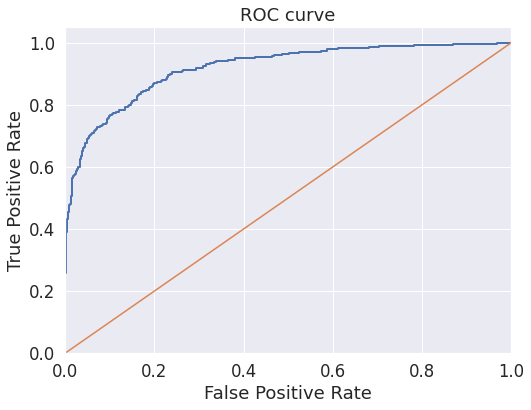

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

Посмотрим на метрики accuracy, precision и recall на тестовой выборке:

In [ ]:
y_test_pred = random_search.best_estimator_.predict(X_test)

In [ ]:
# функция для подсчета метрик
def metrics_scan(y_test, y_test_pred):
    print('Метрики лучшей модели на тестовых данных:')
    accuracy = accuracy_score(y_test, y_test_pred)
    print('accuracy: ', round(accuracy, 2))

    precision = precision_score(y_test, y_test_pred)
    print('precision: ', round(precision, 2))

    recall = recall_score(y_test, y_test_pred)
    print('recall: ', round(recall, 2))

In [ ]:
metrics_scan(y_test, y_test_pred)

Метрики лучшей модели на тестовых данных:
accuracy:  0.92
precision:  0.85
recall:  0.56


Построим матрицу ошибок:

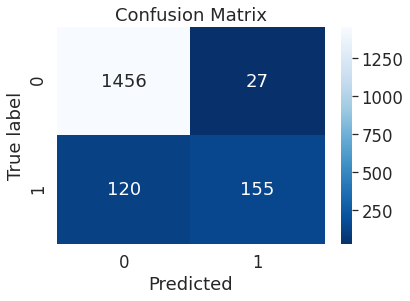

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');

####  Выводы

Из матрицы ошибок видно, что высокая метрика accuracy достигаюся за счет точности модели в определении TrueNegative. Эта метрика малоинформативна в задачах с неравными классами.

Precision - доля объектов, названных положительными и при этом действительно являющимися положительными точно достаточно высок, а вот recall показывающий, какую долю объектов положительного класса из всех объектов положительного класса определила модель небольшой - всего 0.56.

Не зная экономическую составляющую цены ошибки ложноположительного и ложноотрицательного результата, мы не можем настраивать порог классификации для смещения предсказаний модели в какую-либо сторону.

###  Оценка важности признаков

Оценим важность признаков для лучшей модели и построим графики важности признаков с помощью метода SHAP:

In [ ]:
X_train_preprocessed = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
X_test_preprocessed = pipe_final.named_steps['preprocessor'].transform(X_test)

In [ ]:
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

100%|===================| 1752/1758 [00:29<00:00]        

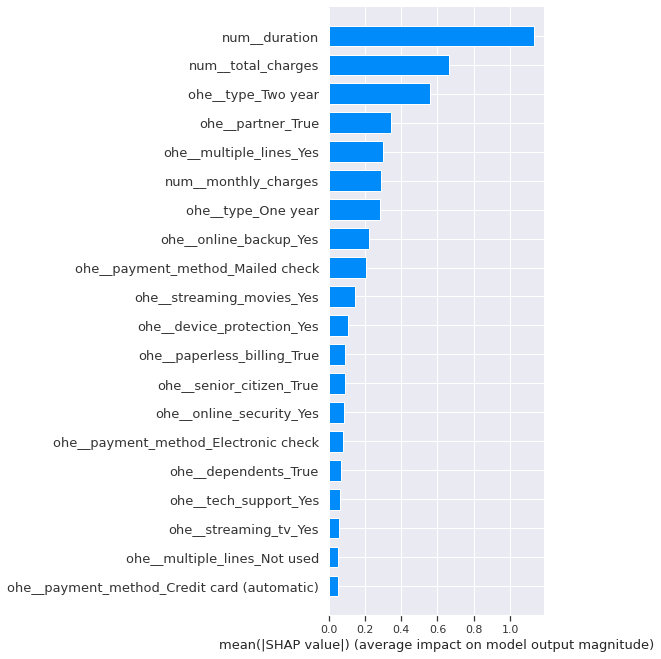

In [ ]:
explainer = shap.TreeExplainer(
    random_search.best_estimator_.named_steps['models'],
    X_test_preprocessed
)
shap_values = explainer(X_test_preprocessed)
shap.summary_plot(shap_values, X_test_preprocessed, plot_type='bar', feature_names=feature_names)

Посмотрим как именно значимые признаки влияют на каждое предсказание модели:

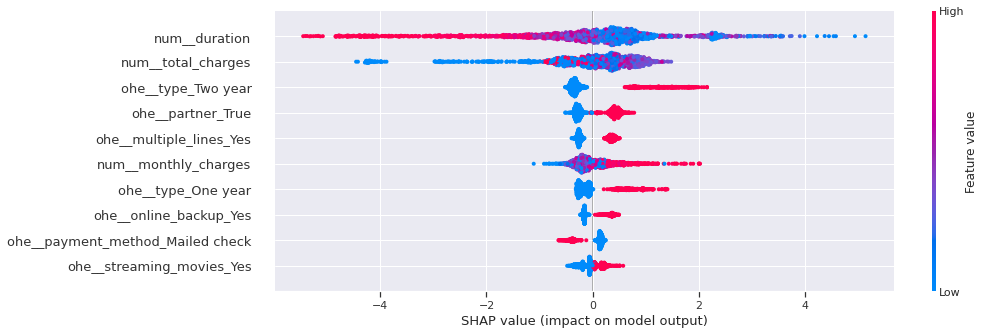

In [ ]:
shap.summary_plot(
    shap_values,
    X_test_preprocessed,
    plot_type='dot',
    plot_size=(15, 5),
    feature_names=feature_names,
    max_display=10
)

###  Выводы

Наиболее значимыми 10-ю признаками для нашей модели предсказуемо оказались признаки показавшие наибольшую корреляцию с целевым признаком при исследовательском анализе, а также некоторые другие, а именно:
 - `duration` - самый значимый признак, чем дольше с нами клиент, тем меньше вероятности его оттока;
 - `total_charges` - второй по значимости признак, чем меньше тратит клиент, тем больше шансов, что его все устраивает и он никуда не собирается;
 - `type` - если заключен двухлетний контракт, вероятность оттока выше;
 - `partner` - наличие партнера, увеличивает шанс оттока клиента;
 - `multiple_lines` - подключение телефона к нескольким линиям одновременно, также веротность оттока;
 - `monthly_charges`- чем ниже месячный тариф, тем лояльнее клиент, можно готовить скидки;
 - `type` - однолетний контракт также увеличивает вероятность оттока;
 - `online_backup` — использование облачного хранилища также увеличивает вероятность оттока клиентов, возможно услуга дорогая и стоит снизить цену;
 - `payment_method` - вида Mailed check способствует лояльности клиента;
 - `streaming_movies` - если потоковое кино подключено, клиент более лоялен.

##  Общий вывод и рекомендации заказчику

**Общие сведения**

Цель проведенного исследования - разработать модель для прогноза оттока клиентов, которое позволит компании заранее находить таких пользователей и предпринять меры по их удержанию в качестве клиентов.  

Для решения задачи была разработана модель, которая предсказывает расторгнет ли абонент договор. Были проанализированы персональные данные о некоторых клиентах, информацию об их тарифах и услугах и разработаны рекомендации по возможным способам удержания клиентов.

**Предобработка данных**

В результате загрузки и анализа данных сделаны следующие выводы:

- названия столбцов выполнено в camelCase нотации с нарушениями правил, требуется перевести столбцы к snake_case нотации;
- тип данных в столбце `TotalCharges` датафрейма `data_contract` содержит количественные данные и определен как `object`, требуется перевести к типу `float64`;
- тип данных в столбце `SeniorCitizen` датафрейма `data_personal` содержит булевы значения и определен как `int64` требуется перевести к типу `bool`;
- выявлены разнородные предположительно булевы типы данных, выраженные Yes-No значениями;
- пропуски в столбцах не обнаружены.

*Результат первоначальной предобрабоки данных:*

1. Наименования столбцов и индекса приведены к snake_case нотации;
2. Тип данный столбца `total_charges` приведен к типу `float64`, данное преобразование привело к появлению 11 строк со значениями NaN. В результате проведенного анализа данные строки удалены;
3. Тип данных столбца `senior_citizen` приведен к типу `bool`;
4. Ошибки и дубликаты в данных не обнаружены.

*Рекомендации по сбору данных:*

1. Данные в столбце `total_charges` рекомендуется сразу собирать в типе `float64`, это позволит своевременно определять пропущенные значения в столбце;
2. Типы данных в столбцах с бинарным признаками рекомендуется собирать в единообразных значениях, не допуская вариаций обозначений по столбцам в типе данных `bool`.

**Исследовательский анализ данных**

*Исследование количественных признаков*

1. На гистограмме столбца `monthly_charges` видно, что большинство клинтов в месяц платят около 20 долларов. Выбросы за границами размаха усов не обнаружены;
2. Столбец `total_charges` имеет правостороннее распределение. Определены выбросы за границами размаха усов, удалять данные выбросы нецелесообразно, так как они либо представляю группу лояльных компании клиентов с длительными контрактами, либо группу клиентов с высокими помесячными тарифами с риском расторжения контракта.

*Исследование качественных признаков*

1. `df_contract`

- Столбец `type` показывает, что более половины клиентов предпочитают помесячныу оплату долгосрочным договорам. Договора на 1 и 2 года делят второрую половину клиентов практически поровну;
- Столбец `paperless_billing` отображает, что 59 % клиентов предпочитают не получать бумажных счетов, это хороший знак для экологии;
- Столбец `payment_method` показывает, что в методе оплаты с 34 % лидирует электронный чек, остальные 3 вида оплаты делят поровну по 22 - 23 % клиентов.

2. `df_personal`

- Столбец `gender` говорит нам о том, что мужчин и женщин в числе клинтов ровно поровну;
- Столбец `senior_citizen` отображает, что всего 16 % клиентов достигли пенсионного возраста;
- Столбец `partner` показывает, что в клиенты с партнерами и без также поделены примерно поровну;
- Столбец `dependents` определил, что у 30 % клиентов есть дети.

3. `df_internet`, `df_phone`

- `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, `multiple_lines` датафреймов `df_internet`, `df_phone` показывают, что различными услугами компании клиенты пользуются с примерно расперделением равным от 37 % к 63 % до 50 % к 50 %.

**Корреляционный анализ**

1. Мультиколлинеарности (очень высокие корреляций (0.9 +)) обнаружены среди столбцами с датами их производными. Для дальнейшего обучения исключим столбцы `begin_date`, `end_date`, `end_date_2`. Также мультиколлинеарности обнаружены внутри признаков с интернет-услугами.

2. Высокие корреляции выявлены между столбцом `monthly_charges` и столбцами с дополнительными интернет-услугами. Это закономерно.

3. Целевой признак `target` имеет слабую корреляцию с входным признаком `duration`, `total_charges`, `monthly_charges`, `partner`, `payment_method` - от 0,21 до 0,37, с остальными признаками корреляция очень слабая.

**Разработка модели по определению вероятность оттока клиента**


Было обучено 2 модели: CatBoostClassifier и LogisticRegression. Методом RandomizedSearchCV подобраны гиперпараметры и определена лучшая модель.

По метрике ROC-AUC для лучшей модели на кросс-валидации: 0.90 лучшей моделью оказалась модель CatBoostClassifier со следующими параметрами: learning_rate': 0.05, iterations': 1000, depth': 4.


Метрика ROC-AUC выбрана по причине несбалансированности целевого признака.


**Оценка лучшей модели на тестовых данных**

AUC-ROC для лучшей модели на тестовых данных: 0.92.

**Критерий успеха: AUC-ROC > 0.85 на тестовой выборке - достигнут.**

Дополнительно были посчитаны следующие метрики и визуализирована матрица ошибок:

Метрики лучшей модели на тестовых данных:
- accuracy:  0.92
- precision:  0.85
- recall:  0.56

**Матрица ошибок**

Из матрицы ошибок увидели, что высокая метрика accuracy достигаюся за счет точности модели в определении TrueNegative. Эта метрика малоинформативна в задачах с неравными классами.

Precision - доля объектов, названных положительными и при этом действительно являющимися положительными тоже достаточно высок, а вот recall показывающий, какую долю объектов положительного класса из всех объектов положительного класса определила модель у небольшой всего 0.56.

Не зная экономическую составляющую цены ошибки ложноположительного и ложноотрицательного результата, мы не можем настраивать порог классификации для смещения предсказаний модели в какую-либо сторону.

**Анализ важности признаков**

Наиболее значимыми 10-ю признаками для нашей модели предсказуемо оказались признаки показавшие наибольшую корреляцию с целевым признаком при исследовательском анализе, а также некоторые другие, а именно:
 - `duration` - самый значимый признак, чем дольше с нами клиент, тем меньше вероятности его оттока;
 - `total_charges` - второй по значимости признак, чем меньше тратит клиент, тем больше шансов, что его все устраивает и он никуда не собирается;
 - `type` - если заключен двухлетний контракт, вероятность оттока выше;
 - `partner` - наличие партнера, увеличивает шанс оттока клиента;
 - `multiple_lines` - подключение телефона к нескольким линиям одновременно, также веротность оттока;
 - `monthly_charges`- чем ниже месячный тариф, тем лояльнее клиент, можно готовить скидки;
 - `type` - однолетний контракт также увеличивает вероятность оттока;
 - `online_backup` — использование облачного хранилища также увеличивает вероятность оттока клиентов, возможно услуга дорогая и стоит снизить цену;
 - `payment_method` - вида Mailed check способствует лояльности клиета;
 - `streaming_movies` - если потоковое кино подключено, клиент более лоялен.

**Рекомендации заказчику**

1. Анализ важности признаков при определении оттока клиента показал, что самым важным признаком, что клиент останется с компанией как можно дольше - это сохранение его как клиента длительное время. А это и есть основаная нашей модели - предотвратить отток.

2. Кроме длительности контракта на лояльность клиента влияет стоимость услуг, а именно чем меньше тратить клиент, тем больше она доволен. Снижение тарифа заранее нецелесообразно с точки зрения прибыли, однако в случае предсказания моделью вероятности, что клиент уйдет, исходя из важности признаков можно рекомендовать следующие мероприятия:
   - скидки на помесячный тариф;
   - скидки при заключении контракта на год или два. Тут хочется добавить, что важность признаков показывает, что клиенты с данными типами оплаты более склоны к расторжению контракта, надо обратить внимание на сколько выгоден данный тип оплаты по сравнению в месячным тарифом, возможно клиенты, готовые оплатить заранее услуги рассчитывают на более серьезные скидки, которые находят у диругих операторов;
   - также стоит обратить внимание (или предлагать скидки) на стоимость подключения телефона к нескольким линиям одновременно и стоимость облачного хранилица, возможно высокая цена данных опций также завтавляет пользователей посмотреть в сторону других компаний.


3. Будет целесообразным определить стоимость цены ошибки модели, если клиент уйдет, и модель не смогла это определить, и стоимость ошибки, если модель предсказала отток лояльному клиенту. Имея такие данные, возможно настроить модель более чувствительной к определенному типу ошибки и таким образом сократить издержки.